# Continuous Time Markov Chains I: Introduction

## Overview

To be added.  Focus is on time-homogeneous chains.  Finite state space.

[Consider generalizing to the countable case.  Can you include the Poisson
process?  Where does the theory get complicated?  Can you get around it by
assuming bounded positive rates?]

[If the above works, start with the Poisson process as an example.  Try
replacing exponentials with some other distribution and argue that the Markov
property fails.  Use a simple two state example.  We want to know not just
whether $X_t$ is in state $x$, but also how long.  This violates the Markov
assumption.]

The state space is $S = \{x_1, \ldots, x_n\}$, where each $x_i$ is a real number.

Informally, a continuous time $S$-valued Markov chain $(X_t)_{t \geq 0}$ is an $S$-valued stochastic process indexed by $t \in \mathbb R_+$ that has the Markov property.

Having the Markov property means that $(X_t)_{t < r}$ and $(X_t)_{t \geq r}$ are independent given $X_r$.

As we will see, the Markov property imposes a great deal of valuable structure.

We will use the following imports

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import quantecon as qe
from numba import njit


## A Model of Inventory Dynamics

Let's now meet our first continuous time Markov chain on a finite state space.

Let $X_t$ be the inventory of a firm at time $t$,
taking values in the integers $0, 1, \ldots, b$.

If $X_t > 0$, then a customer arrives after $W$
units of time, where $W \sim E(\lambda)$ for some fixed $\lambda > 0$.

Each customer purchases $\min\{U, X_t\}$ units, where $U$ is an IID draw from
the geometric distribution

$$
    \mathbb P\{U = u\} = (1-\alpha)^{k-1} \alpha
    \qquad (k = 1, 2, \ldots, \; \alpha \in (0, 1))
$$

If $X_t = 0$, then no customers arrive and the firm places an order for $b$ units.

The order arrives after a delay of $D$ units of time, where $D \sim E(\lambda)$.

(We use the same $\lambda$ here just for convenience, to simplify the exposition.)

### Representation

The inventory process jumps to a new value either when a new customer arrives
$(X_t > 0)$ or when new stock arrives $(X_t = 0)$.

Between these arrival times it is constant.

Hence, to track $X_t$, it is enough to track the jump times and the new values
taken at the jumps.

In what follows, we denote the jump times by $\{J_k\}$ and the values at jumps
by $Y_k$.

Then 

$$
    X_t = \sum_{k \geq 0} Y_k \mathbb 1\{J_k \leq t < J_{k+1}\}
    \qquad (t \geq 0)
$$ (xfromy)



### Simulation

Let's simulate this process, starting at $X_0 = 0$.

As above,

* $\{J_k\}$ gives the time of the jumps in inventory.
* $Y_k$ gives the size of the inventory after the $k$-th jump.
* $(X_t)$ is defined from these objects via {eq}`xfromy`.

Here's a function that simulates one path.

In [2]:
def sim_path(seed=123, sim_length=30, λ=0.5, α=0.7, b=10):

    J = np.zeros(sim_length)
    Y = np.zeros(sim_length)
    k = 0
    np.random.seed(seed)

    for k in range(sim_length-1):
        W = np.random.exponential(scale=1/λ)  # W ~ E(λ)
        J[k+1] = J[k] + W
        if Y[k] == 0:
            Y[k+1] = b
        else:
            Y[k+1] = Y[k] - min(Y[k], np.random.geometric(α))
    return J, Y

Let's plot the process $\{X_t\}$ using the ``step`` method of ``ax``.

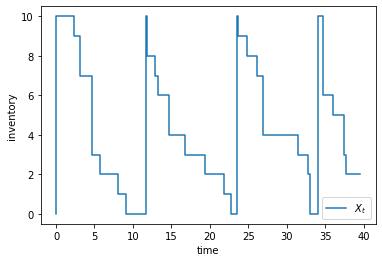

In [3]:
J, Y = sim_path()

fig, ax = plt.subplots()
ax.step(J, Y, label="$X_t$")

ax.set(xlabel="time", ylabel="inventory")

ax.legend()
plt.show()

As expected, inventory falls and then jumps back up to $b$.

We might now ask questions such as "What fraction of time does $X_t = 0$ hold
over a long time series?"

Before we dig deeper, however, let us turn to some definitions.

## Markov Processes

[add roadmap]

### Definitions

A continuous time stochastic process $(X_t)$ on $S$ is a family of $S$-valued
random variables $X_t$ defined on a common probability space.

A **transition semigroup** is a family $(P_t)_{t \geq 0}$ of Markov matrices
satisfying $P_0 = I$, where $I$ is the $n \times n$ identity matrix, and

$$
    P_{s + t} = P_s P_t
    \qquad (s, t \geq 0)
$$ (chapkol_ct)

The interpretation of $P_t(x, y)$ is the probability of moving from state $x$
to state $y$ in $t$ units of time.

Equation {eq}`chapkol_ct` is a version of the **Chapman-Kolmogorov equation**.

This becomes clearer if we write it more explicitly as

$$
    P_{s+t}(x, y) 
    = \sum_{z \in S} P_s(x, z) P_t(z, y)
$$

A stochastic process $(X_t)$ is called a (time homogeneous) **Markov process** on $S$
with transition semigroup $(P_t)$ if

$$
    \mathbb P\{X_t = y \,|\, (X_r)_{r \leq s} \}
    = P_{t - s} (X_s, y)
$$

with probability one for all $y \in S$ and $s \leq t$.


### Back to Inventories